In [110]:
import os
import gensim
from gensim.utils import simple_preprocess
from nltk import word_tokenize
from nltk import sent_tokenize
from nltk import FreqDist
import matplotlib.pyplot as plt

# Zipf's Law

The freqency of a word is inversely proportional to its rank.

In simpler terms, the most common word will appear roughly twice as often as the second most common word, three times as often as the third most common word, and so on.

In [111]:
data_dir = "/kaggle/input/stephen-king-books"

In [112]:
file_names = os.listdir(data_dir)

file_dirs = []

for file_name in file_names:
    file_dir = os.path.join(data_dir, file_name)
    file_dirs.append(file_dir)

In [113]:
with open(file_dirs[8], "r") as file:
    text = file.read()

In [114]:
sentences = sent_tokenize(text)

In [115]:
text = text.replace("\n", " ")

In [116]:
clean_text = simple_preprocess(text)
#clean_text

In [117]:
word_freq = FreqDist(clean_text)
word_freq

FreqDist({'the': 10491, 'and': 5177, 'of': 4392, 'to': 3710, 'he': 3611, 'it': 3261, 'was': 2803, 'his': 2620, 'in': 2485, 'that': 2027, ...})

In [118]:
items = list(word_freq.items())
sorted_items = sorted(items, key=lambda x:x[1], reverse=True)

frequencies = [freq for _, freq in sorted_items]

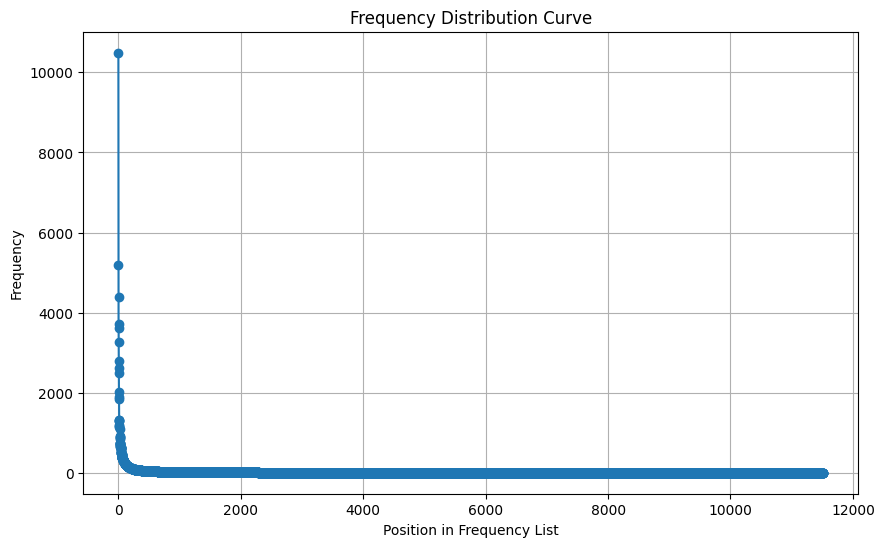

In [119]:
plt.figure(figsize=(10, 6))
plt.plot(frequencies, marker="o", linestyle="-")
plt.xlabel("Position in Frequency List")
plt.ylabel("Frequency")
plt.title("Frequency Distribution Curve")
plt.grid(True)
plt.show()

### Without Using NLTK

In [237]:
tokens = text.split()

In [121]:
unique_words = {}

for token in tokens:
    if token not in unique_words:
        unique_words[token] = 1
    else:
        unique_words[token] += 1

In [122]:
frequencies = sorted(unique_words.values(), reverse=True)

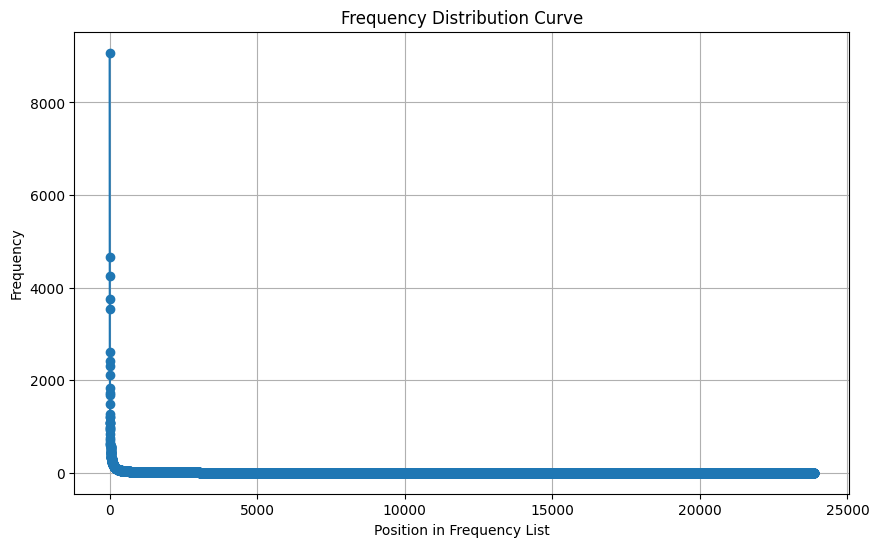

In [123]:
plt.figure(figsize=(10, 6))
plt.plot(frequencies, marker="o", linestyle="-")
plt.xlabel("Position in Frequency List")
plt.ylabel("Frequency")
plt.title("Frequency Distribution Curve")
plt.grid(True)
plt.show()

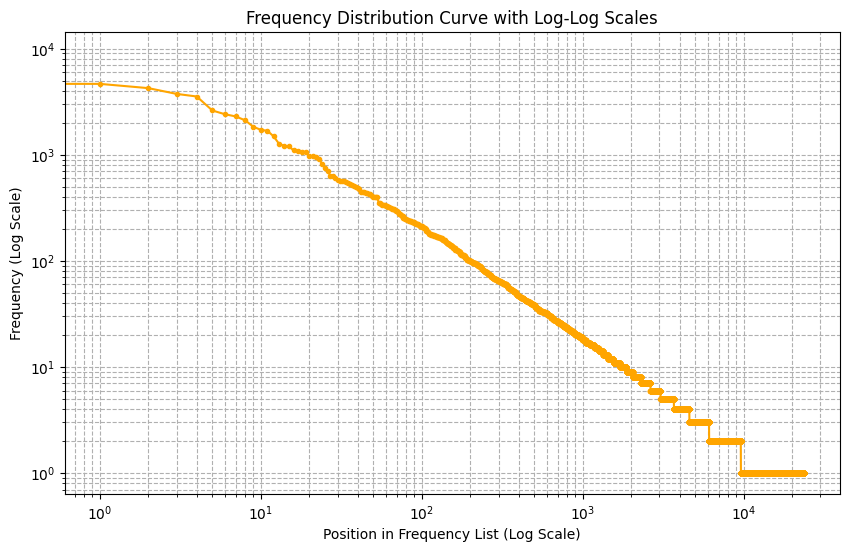

In [124]:
plt.figure(figsize=(10, 6))
plt.plot(frequencies, marker=".", linestyle="-", color="orange")
plt.xscale("log")
plt.yscale("log")
plt.xlabel("Position in Frequency List (Log Scale)")
plt.ylabel("Frequency (Log Scale)")
plt.title("Frequency Distribution Curve with Log-Log Scales")
plt.grid(True, which="both", ls="--")
plt.show()

# Random Text Generation Using a n-gram Model

In [109]:
import nltk
from nltk import FreqDist, ConditionalFreqDist, ngrams

In [174]:
def build_ngram_model(tokens, n):
    ngram_model = list(ngrams(tokens, n, pad_left=True, pad_right=True, left_pad_symbol="<s>", right_pad_symbol="</s>"))
    ngram_freq = FreqDist(ngram_model)
    context_freq = ConditionalFreqDist((tuple(ngram[:-1]), ngram[-1]) for ngram in ngram_freq)
    
    return ngram_model, ngram_freq, context_freq

In [176]:
bigram_model, bigram_freq, bigram_context_freq = build_ngram_model(tokens, 2)
trigram_model, trigram_freq, trigram_context_freq = build_ngram_model(tokens, 3)
fourgram_model, fourgram_freq, fourgram_context_freq = build_ngram_model(tokens, 4)

In [194]:
for item in fourgram_context_freq.items():
    print(item)
    
    break

(('<s>', '<s>', '<s>'), FreqDist({'THE': 1}))


In [203]:
def generate_text(n, num_words, context_freq):

    context = ("<s>",) * (n - 1)
    generated_words = []

    for _ in range(num_words):
        next_word_candidates = context_freq[context]
        if not next_word_candidates:
            break
    
        next_word = random.choices(list(next_word_candidates.keys()), list(next_word_candidates.values()))[0]
        if next_word == "</s>":
            break
        
        generated_words.append(next_word)
        context = context[1:] + (next_word,)
    
    generated_text = " ".join(generated_words)

    return generated_text

In [215]:
bigram_generated_text = generate_text(2, 100, bigram_context_freq)
trigram_generated_text = generate_text(3, 100, trigram_context_freq)
fourgram_generated_text = generate_text(4, 100, fourgram_context_freq)

In [216]:
print(f"----- Text Generated by Bigram Model -----\n\n {bigram_generated_text}\n")
print(f"----- Text Generated by 3-gram Model -----\n\n {trigram_generated_text}\n")
print(f"----- Text Generated by 4-gram Model -----\n\n {fourgram_generated_text}\n")

----- Text Generated by Bigram Model -----

 THE fence between banks of camp. Old Folks left hand were probably around but then cackled. “In fact, that shook his attention, she pushed its bullseye. “Missed me, boy—what’s this close, the marker, Susannah did, Eddie handed his diminished right were actually see it?” “FIFTY SECONDS.” “Yes. You think they’re tired poet you like pigtails, seized by Odetta Holmes/Detta Walker, and balked like one.” Roland understood Lud, there must say I’m all surreal. There was, when Aunt Talitha— a hot fur coats of Piper seemed long fingers crawled hither and redistributed the chasm. And how, at better all waved, and

----- Text Generated by 3-gram Model -----

 THE DARK TOWER III STEPHEN KING NOVELS Carrie ’Salem’s Lot The Shining Rose Red The Storm of the corner of my mates, and shoot straighter, but I’ve never been there were a tornado funnel. He cringed back at Aunt Talitha. “I don’t remember.” “You know, I doubt if they know how he fell from her arms.

The quality of the `4-gram model` is better than the `3-gram`, and the `3-gram` better than the `2-gram`. For example, the 4-gram model exhibits fewer grammatical errors and overall produces more coherent texts. In contrast, the `2-gram` model tends to be more creative in terms of content.

# Statitical Dependence

In [282]:
tokens_lower = [token.lower() for token in tokens]

unigram_model, unigram_freq, unigram_context_freq = build_ngram_model(tokens_lower, 1)
bigram_model, bigram_freq, bigram_context_freq = build_ngram_model(tokens_lower, 2)

In [283]:
num_unigram = len(unigram_model)
num_bigram = len(bigram_model)
num_trigram = len(trigram_model)
num_fourgram = len(fourgram_model)

num_unigram, num_bigram, num_trigram, num_fourgram

(179077, 179078, 179079, 179080)

In [284]:
def create_freq_dict(freq):
    freq_dict = {}
    
    for item in freq.items():
        key = item[0]
        value = item[1]
        freq_dict[key] = value
        
    return freq_dict

In [285]:
unigram_freq_dict = create_freq_dict(unigram_freq)
bigram_freq_dict = create_freq_dict(bigram_freq)

In [286]:
def get_ngram_prob(ngram_freq_dict, num_ngram):
    ngram_prob = {}

    for key, value in ngram_freq_dict.items():
        ngram_prob[key] = value / num_ngram
        
    return ngram_prob

In [287]:
unigram_prob = get_ngram_prob(unigram_freq_dict, num_unigram)
bigram_prob = get_ngram_prob(bigram_freq_dict, num_bigram)

In [339]:
#for key in unigram_prob.keys():
#    print(key)
    
#    break

In [332]:
import math

pmi_dict = {}

for key, value in bigram_prob.items():
    word_pair = key
    w1, w2 = word_pair
    
    w1_tuple = (w1,)
    w2_tuple = (w2,)
    
    if w1_tuple in unigram_prob and w2_tuple in unigram_prob:
        if unigram_freq[w1_tuple] >= 10 and unigram_freq[w2_tuple] >= 10:
            pmi = math.log(value / (unigram_prob[w1_tuple] * unigram_prob[w2_tuple]))
            pmi_dict[word_pair] = pmi
    else:
        pmi_dict[word_pair] = float("-inf")

In [334]:
sorted_pmi_dict = sorted(pmi_dict.items(), key=lambda x: x[1], reverse=True)

In [335]:
sorted_pmi_dict[:20]

[(('st.', 'louis'), 9.456508246135392),
 (('mid-world', 'railway'), 8.87668975088245),
 (('mrs.', 'shaw'), 8.70987238062446),
 (('ventilator', 'grille'), 8.694368194088495),
 (('ms.', 'avery'), 8.674565566792316),
 (('“', '‘i'), 8.56920505113449),
 (('vacant', 'lot,'), 8.540217514261238),
 (('choo-choo.', 'choo-choo.'), 8.508580429318055),
 (('waste', 'lands'), 8.471224642774287),
 (('penguin', 'books'), 8.438434819951295),
 (('detta', 'walker'), 8.386883494340536),
 (('overhead', 'cables'), 8.31137594183239),
 (('aunt', 'talitha'), 8.268283798777595),
 (('following', 'page'), 8.22436456484276),
 (('final', 'essay'), 8.144321857169224),
 (('doorkeeper', 'roared'), 8.088232390518181),
 (('evening', 'rising'), 8.0583794273685),
 (('fat', 'lady'), 8.052514307916102),
 (('mr.', 'bissette'), 8.037588657699425),
 (('engineer', 'bob'), 8.02142372084607)]

In [338]:
sorted_pmi_dict[-20:]

[(('at', 'and'), -3.590514091507418),
 (('her', 'the'), -3.633763664538554),
 (('a', '.'), -3.650977578714024),
 (('she', 'the'), -3.6607923369264737),
 (('it', 'he'), -3.686219505517653),
 (('this', 'the'), -3.695730388287754),
 (('of', '.'), -3.733241913685049),
 (('had', 'of'), -3.807225220875697),
 (('the', 'roland'), -3.894839193545623),
 (('the', 'jake'), -4.0223442579447095),
 (('his', 'a'), -4.067051331015965),
 (('and', 'of'), -4.105787916487818),
 (('the', 'on'), -4.1804675759694465),
 (('his', 'and'), -4.285197370679703),
 (('he', 'of'), -4.412034079909251),
 (('of', 'to'), -4.484855552744959),
 (('to', 'and'), -4.620737257437671),
 (('a', 'and'), -4.716670762076739),
 (('<s>', 'the'), -inf),
 (('note', '</s>'), -inf)]

Unigram models assume that the occurrence of words is independent of each other. And if the probability of one word occurring doesn't influence another word, `pmi(w1, w2) = 0`. 

Here, a bigram model is employed. In a bigram model, the occurrence of `w2` depends on `w1`, and consequently, `pmi(w1, w2)` does not equal 0. In the output data from this bigram model, the pmi values are either negative or positive, except for the `w1` and `w2` that do not exist in the unigram, which aligns with the independence assumption for unigram models.

- **PMI (Pointwise Mutual Information)**:

 * `P(w1, w2)` is the joint probability of `w1` and `w2` occurring together, and `P(w1)` and `P(w2)`.
 * If `w1` and `w2` appear together more frequently than their PMI score would be high, indicating a strong association.